In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data into pandas dataframes
df_customers = pd.read_csv("dim_customers.csv")
df_products = pd.read_csv("dim_products.csv")
df_date = pd.read_csv("dim_date.csv")
df_targets_orders = pd.read_csv("dim_targets_orders.csv")
df_order_lines = pd.read_csv("fact_order_lines.csv")
df_orders_aggregate = pd.read_csv("fact_orders_aggregate.csv")

In [3]:
# Create a dataframe with OT %, IF %, and OTIF % for each order
df_otif = df_orders_aggregate.groupby("customer_id").agg({"on_time": "mean", "in_full": "mean", "otif": "mean"})
df_otif.rename(columns={"on_time": "OT %", "in_full": "IF %", "otif": "OTIF %"}, inplace=True)

In [4]:
df_otif.rename

<bound method DataFrame.rename of                  OT %      IF %    OTIF %
customer_id                              
789101       0.725944  0.583435  0.381242
789102       0.698317  0.582933  0.359375
789103       0.749693  0.179141  0.105521
789121       0.296144  0.671862  0.203445
789122       0.286535  0.222496  0.071429
789201       0.725765  0.568878  0.371173
789202       0.730724  0.606168  0.403321
789203       0.713253  0.584337  0.369880
789220       0.723404  0.595745  0.397997
789221       0.713105  0.599764  0.393152
789301       0.693587  0.581948  0.352732
789303       0.704878  0.635366  0.415854
789320       0.708434  0.604819  0.389157
789321       0.724138  0.602217  0.385468
789401       0.728395  0.587654  0.396296
789402       0.739976  0.591738  0.407047
789403       0.740834  0.613148  0.424779
789420       0.281796  0.687448  0.212801
789421       0.283291  0.238338  0.079729
789422       0.278253  0.672945  0.196918
789501       0.710074  0.598280  0.395577


In [5]:

# Merge the target data with the calculated OTIF % data
df_otif = df_otif.merge(df_targets_orders, on="customer_id")


In [6]:
df_otif

,customer_id,OT %,IF %,OTIF %,ontime_target%,infull_target%,otif_target%
0,789101,0.725944,0.583435,0.381242,86,80,69
1,789102,0.698317,0.582933,0.359375,90,81,73
2,789103,0.749693,0.179141,0.105521,92,67,62
3,789121,0.296144,0.671862,0.203445,78,77,60
4,789122,0.286535,0.222496,0.071429,76,65,49
5,789201,0.725765,0.568878,0.371173,87,81,70
6,789202,0.730724,0.606168,0.403321,85,81,69
7,789203,0.713253,0.584337,0.369880,92,76,70
8,789220,0.723404,0.595745,0.397997,91,76,69
9,789221,0.713105,0.599764,0.393152,85,80,68


In [9]:
# Create a flag to indicate if the OT %, IF %, or OTIF % is below the target level
df_otif["OT % below target"] = df_otif["OT %"] < df_otif["ontime_target%"]
df_otif["IF % below target"] = df_otif["IF %"] < df_otif["infull_target%"]
df_otif["OTIF % below target"] = df_otif["OTIF %"] < df_otif["otif_target%"]


In [10]:
# Print the data for inspection
df_otif

,customer_id,OT %,IF %,OTIF %,ontime_target%,infull_target%,otif_target%,OT % below target,IF % below target,OTIF % below target
0,789101,0.725944,0.583435,0.381242,86,80,69,True,True,True
1,789102,0.698317,0.582933,0.359375,90,81,73,True,True,True
2,789103,0.749693,0.179141,0.105521,92,67,62,True,True,True
3,789121,0.296144,0.671862,0.203445,78,77,60,True,True,True
4,789122,0.286535,0.222496,0.071429,76,65,49,True,True,True
5,789201,0.725765,0.568878,0.371173,87,81,70,True,True,True
6,789202,0.730724,0.606168,0.403321,85,81,69,True,True,True
7,789203,0.713253,0.584337,0.369880,92,76,70,True,True,True
8,789220,0.723404,0.595745,0.397997,91,76,69,True,True,True
9,789221,0.713105,0.599764,0.393152,85,80,68,True,True,True


In [13]:
# Calculate the percentage of orders delivered on-time and in-full
ontime_perc = df_otif["ontime_target%"].mean() * 100
infull_perc = df_otif["infull_target%"].mean() * 100


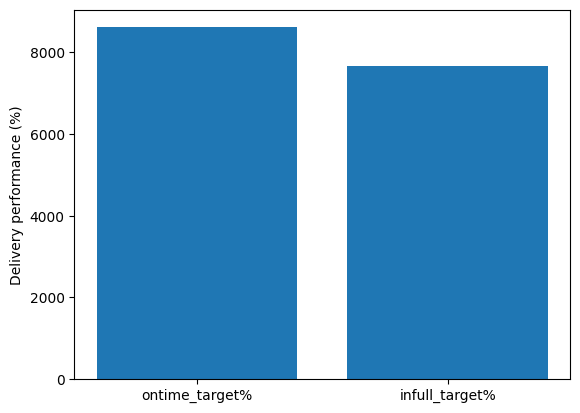

In [14]:
# Plot the results
fig, ax = plt.subplots()
ax.bar(["ontime_target%", "infull_target%"], [ontime_perc, infull_perc])
ax.set_ylabel("Delivery performance (%)")
plt.show()